# Gradient descent

To find the infimum of an arbitrary cost function, we use here the gradient descent. Let us consider the function $f(x,y)=2x^2+y^2-xy+2$ that we aim at minimizing on $ \mathbb{R}^2$.
We start by manually compute its gradient and we will display its evolution during gradient descent.

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip


In [66]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,y):
    return ...
def df(x,y):
    return ...

We need to define a norm to now how far from the global solution we are.


In [67]:
def norm(a):
    return np.sqrt(a[0]**2+a[1]**2)

In [68]:
## start GD algorithm
eps=1e-6
alpha=0.1 #test with alpha=1
x0,y0=1,2
evolution = [[x0, y0]]
grad_f = df(x0, y0)
while ...>=eps:
    d = ...
    x0, y0 = ...
    evolution = ...
    grad_f = ...



In [69]:
evolution_X = evolution[:, 0]
evolution_Y = evolution[:, 1]

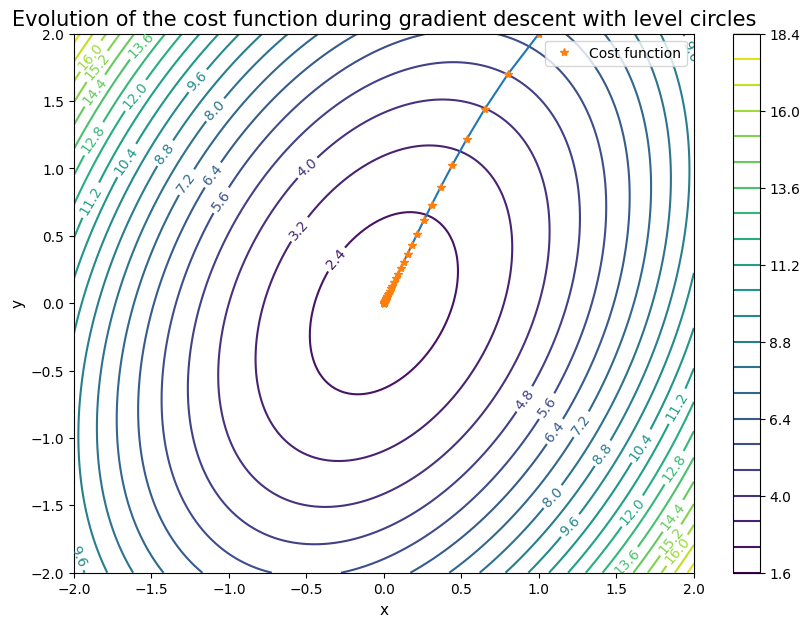

In [70]:
x1 = np.linspace(-2, 2, 150)
y1 = np.linspace(-2, 2, 150)
Xx, Yy = np.meshgrid(x1, y1)
Z = fxy(Xx, Yy)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(Xx, Yy, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X, evolution_Y)
plt.plot(evolution_X, evolution_Y, '*', label = "Cost function")
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

With $\alpha=1$, the solution blows up, a correct choice for $\alpha$ is very important. That is why, we will proceed with Armijo rule: 

In [103]:
c1=.6
beta=1. #test with beta=1
gamma=0.01

def phik(xyk,alphak,dk):
    return ...

def dphik(xyk,alphak,dk):
    grad_f=...
    return ...

def armijo_rule(alpha,xy_old,d): #d_x est la direction de descente d_x . grad_x <= 0
    # test f(x_new) \leq f(x_0) + c alpha ps{d_x}{grad_x}
    test = 1
    iter=0   
    while test!=0 and iter<500: 
        if phik(xy_old,alpha,d)<=...:     
            test = 0
        else:
            alpha*=gamma

        iter+=1
    return alpha    
    
#initialization for Armijo
alpha=beta

## start GD algorithm
eps=1e-6
x0,y0=1,2
evolution = [[x0, y0]]
grad_f = dfxy(x0, y0)
cpt_grad=0

while norm(grad_f)>=eps and cpt_grad<500:
    
    d = -grad_f
    #armijo
    alpha=beta
    xy_old=np.array([x0,y0])
    cpt=0
    alpha=armijo_rule(alpha,xy_old,d)
    #while phik(xy_old,alpha,d)>phik(xy_old,0,d)+c1*dphik(xy_old,0,d)*alpha and cpt<500:
    #    alpha*=gamma
    #    cpt+=1
    x0, y0 = x0 + alpha*d[0], y0 + alpha*d[1] 
    evolution = np.vstack((evolution, [x0, y0]))
    grad_f = dfxy(x0, y0)
    cpt_grad+=1



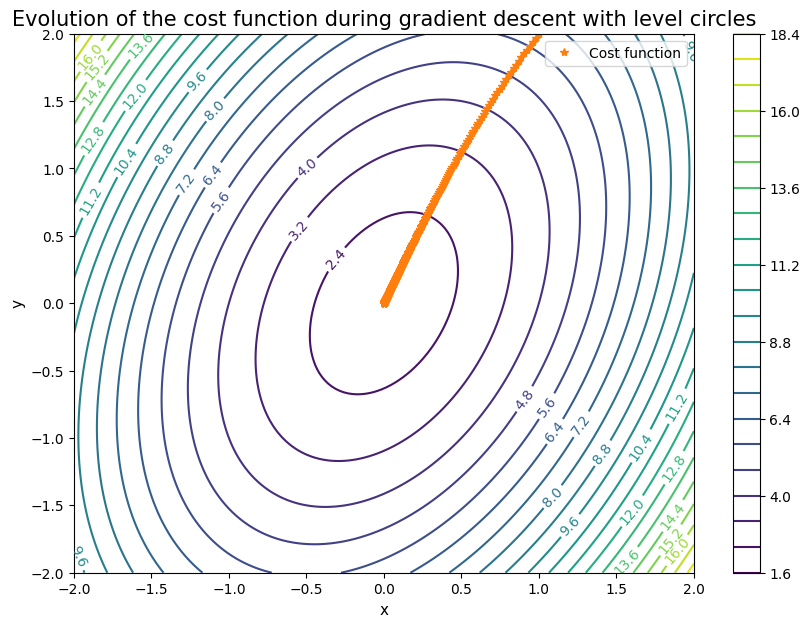

In [104]:
evolution_X = evolution[:, 0]
evolution_Y = evolution[:, 1]
x1 = np.linspace(-2, 2, 150)
y1 = np.linspace(-2, 2, 150)
Xx, Yy = np.meshgrid(x1, y1)
Z = fxy(Xx, Yy)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(Xx, Yy, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X, evolution_Y)
plt.plot(evolution_X, evolution_Y, '*', label = "Cost function")
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

In [121]:
# Wolfe rule:

c1=.6
c2=.8
beta=1 #test with beta=1
eta=2.
gamma=0.01

def phik(xyk,alphak,dk):
    return ...

def dphik(xyk,alphak,dk):
    grad_f=...
    return np.dot(grad_f,dk)

    
def wolfe_rule(alpha,xy_old,d): #d_x est la direction de descente d_x . grad_x <= 0
    # test f(x_new) \leq f(x_0) + c alpha ps{d_x}{grad_x}

    test = 1
    iteration = 0
    min_ = 0
    max_ = 1000
    while (phik(xy_old,alpha,d)<=(phik(xy_old,0,d)+c1*dphik(xy_old,0,d)*alpha)) &(iteration<=500): #armijo ok
        alpha=eta*alpha
    iteration = 0
    while (test!=0)&(iteration<=500): 
        xnew0,xnew1=xy_old[0]+alpha*d[0],...
        if (phik(xy_old,alpha,d)<= (phik(xy_old,0,d)+c1*dphik(xy_old,0,d)*alpha)) & (np.dot(df(xnew0,xnew1),d) >= c2*np.dot(df(xy_old[0],xy_old[1]),d) ):
            test = 0
        elif phik(xy_old,alpha,d)> ...: #no armijo
            max_ = ...
            alpha = ...
            iteration = iteration +1
        else: # armijo ok
            minorant = ...
            alpha = ...
            iteration = iteration +1
    return alpha


#initialization for Armijo
alpha=beta

## start GD algorithm
eps=1e-6
x0,y0=1,2
evolution = [[x0, y0]]
grad_f = dfxy(x0, y0)
cpt_grad=0

while norm(grad_f)>=eps and cpt_grad<500:
    
    d = -grad_f
    #armijo
    alpha=beta
    xy_old=np.array([x0,y0])
    cpt=0
    alpha=wolfe_rule(alpha,xy_old,d)
    x0, y0 = x0 + alpha*d[0], y0 + alpha*d[1] 
    evolution = np.vstack((evolution, [x0, y0]))
    grad_f = dfxy(x0, y0)
    cpt_grad+=1


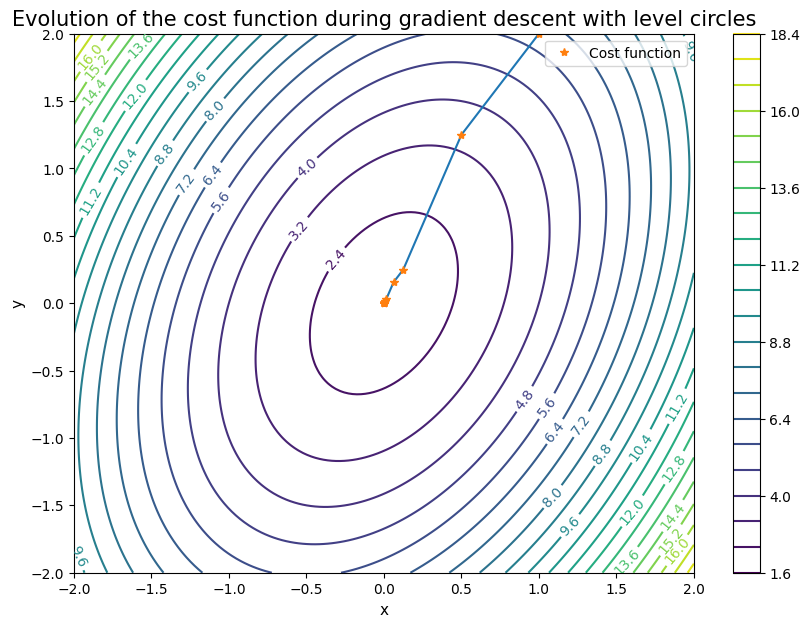

In [122]:
evolution_X = evolution[:, 0]
evolution_Y = evolution[:, 1]
x1 = np.linspace(-2, 2, 150)
y1 = np.linspace(-2, 2, 150)
Xx, Yy = np.meshgrid(x1, y1)
Z = fxy(Xx, Yy)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(Xx, Yy, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Evolution of the cost function during gradient descent with level circles", fontsize=15)
plt.plot(evolution_X, evolution_Y)
plt.plot(evolution_X, evolution_Y, '*', label = "Cost function")
plt.xlabel('x', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()